In [ ]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

## 1. Data preaparing and loading

Let's create some data using linear regression formula.

In [ ]:
# create known paramaters:
weight = 0.7
bias = 0.3

In [ ]:
# create:
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Visualize the first 10 of X and the first 10 of y
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Spliting the data into train and test:

In [ ]:
# create a train/test split:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

## 2. Build our first model

Pytorch essential neural network building models:

**torch.nn** : Contains all of the building blocks for neural networks.

**torch.nn.Module** : The base class for all neural networks modules. If you are building a neural network in PyTorch, your modules should subclass nn.Module. Requires forward() method be implemented.

**torch.optim** : Contains various optimization algorithms.

**torch.utils.data.Dataset** : Represents a map between key (label) and sample (features) pairs of your data. Such as images and their associated labels.

**torch.utils.data.DataLoader** : Creates a python iterable over a torch Dataset ( allows you to iterate over your data).




In [ ]:
# create linear regression model class:
class LinearRegressionModel(nn.Module):
  # initialise model paramaters such as : different layers from torch.nn, single paramaters ..
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



## 3. Checking the contents of our PyTorch model

We can check our model or what is inside our model using .paramaters()

In [ ]:
# create a random seed:
torch.manual_seed(42)
# create an instance of the model:
model_0 = LinearRegressionModel()

In [ ]:
# check out the paramaters:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# list named paramaters:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## 4. Making predictions using torch.inference_mode()

To check our model 's predictive power, let's see how well it predicts y_test based on X_test.

In [ ]:
# Make predictions:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions using inference_mode():
# Make predictions more faster with huge data size:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

## 5. Setup a loss function and an optimizer

Loss functions are classes in the pytorch.nn module.

Optimizers are classes in torch.optim package.

In [ ]:
# Set up a loss function:
loss_fn = nn.L1Loss()

In [ ]:
# Setup an optimzer (SGD):
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## 6. Building a training loop and testing loop in pytorch

Let’s explain exactly how the optimizer “knows” about loss.backward(), optimizer knows which gradients to use because you gave it the model’s parameters when you created it:

*optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)*

Here, model_0.parameters() is a list of all trainable weights in the model.
Each of these parameters has a .grad attribute that loss.backward() fills in.

So the steps look like this:

1. loss.backward() → computes gradients and stores them in param.grad for every parameter.

2. optimizer.step() → looks at each param.grad and updates the parameter.

In [ ]:
# create a random seed:
torch.manual_seed(42)
# an epoch is one loop through the data (this is a hyperparamter):
epochs = 200

# Tracking different values:
epochs_count = []
loss_values = []
test_loss_values = []

# Training:
# 0. Loop through the data:
for epoch in range(epochs):
  # set the model in the training mode:
  model_0.train()
  # 1. forward pass:
  y_pred = model_0(X_train)
  # 2. calculate the loss:
  loss = loss_fn(y_pred, y_train)
  # 3. optimizer zero grad:
  optimizer.zero_grad()
  # 4. perform backpropagation on the loss with respect to the paramaters, computes gradients of the loss with respect to each model parameter.:
  loss.backward()
  # 5. step the optimizer (perform gradient descent), Updates the model’s weights using the gradients:
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation
  with torch.inference_mode():
    # 1. Do the forward pass:
    test_pred = model_0(X_test)
    # 2. calculate the loss:
    test_loss = loss_fn(test_pred, y_test)
  # print out what happening:
  if epoch % 10 == 0:
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [ ]:
# here we turn the lists to numpy because the 2 lists store scalar tensors:
loss_values = torch.tensor(loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

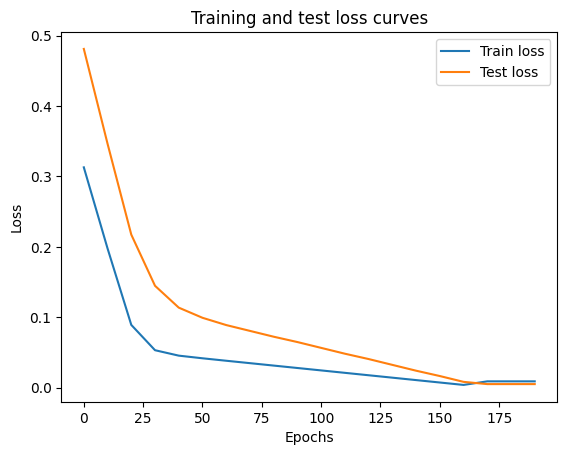

In [ ]:
# plot the learning curve:
plt.plot(epochs_count, loss_values, label="Train loss")
plt.plot(epochs_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 7. Saving a model in pytorch

When it comes to saving and loading models, there are three core functions to be familiar with:

1. torch.save: Saves a serialized object to disk. This function uses Python’s pickle utility for serialization. Models, tensors, and dictionaries of all kinds of objects can be saved using this function.
2. torch.load: Uses pickle’s unpickling facilities to deserialize pickled object files to memory. This function also facilitates the device to load the data into (see Saving & Loading Model Across Devices).
3. torch.nn.Module.load_state_dict: Loads a model’s parameter dictionary using a deserialized state_dict.

In [ ]:
# Saving our PyTorch model:

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "model_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


# 3. Save the model state dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

## 8. Loading pytorch model

Since we saved our model's *state_dict()* rather the entire model, we will create a new instance of our model class and load the saved state_dict() into that.

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
# Load the saved state_dict of model_0:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)